In [1]:
# computational libraries
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np

# plotting libraries
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# preprocessing
from sklearn.preprocessing import StandardScaler

This cell constructs a Series called y that contains the target feature - in this case, hourly electricity demand.

In [20]:
# read clean electricity data to create target variable array y
elec = pd.read_csv('../data/elec_clean.csv',index_col=0)
elec.index = pd.to_datetime(elec.index,format='%Y-%m-%d %H:00:00')

# remove Davenport for now because it is missing most of June and July
elec.drop('Davenport',axis=1,inplace=True)

y = pd.Series(elec.iloc[:, 0:11].sum(axis=1))
y.head()

2018-01-01 01:00:00    689.2
2018-01-01 02:00:00    655.3
2018-01-01 03:00:00    701.2
2018-01-01 04:00:00    699.8
2018-01-01 05:00:00    700.3
dtype: float64

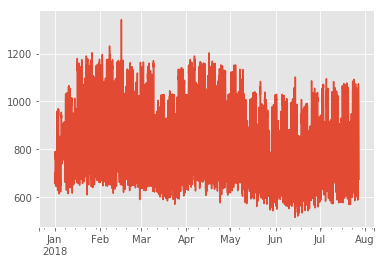

In [36]:
model=sm.tsa.ARIMA(endog=y,order=(1,1,6),freq='H')
results=model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 4990
Model:                 ARIMA(1, 1, 6)   Log Likelihood              -26742.252
Method:                       css-mle   S.D. of innovations             51.413
Date:                Thu, 28 Mar 2019   AIC                          53502.504
Time:                        10:20:46   BIC                          53561.141
Sample:                    01-01-2018   HQIC                         53523.057
                         - 07-27-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0126      0.020     -0.630      0.529      -0.052       0.027
ar.L1.D.y      0.8061      0.012     65.447      0.000       0.782       0.830
ma.L1.D.y     -0.6406      0.018    -34.807      0.0

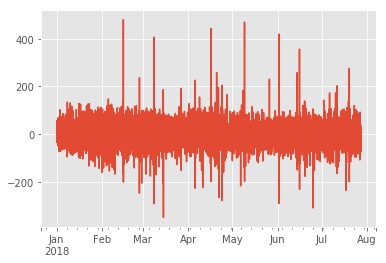

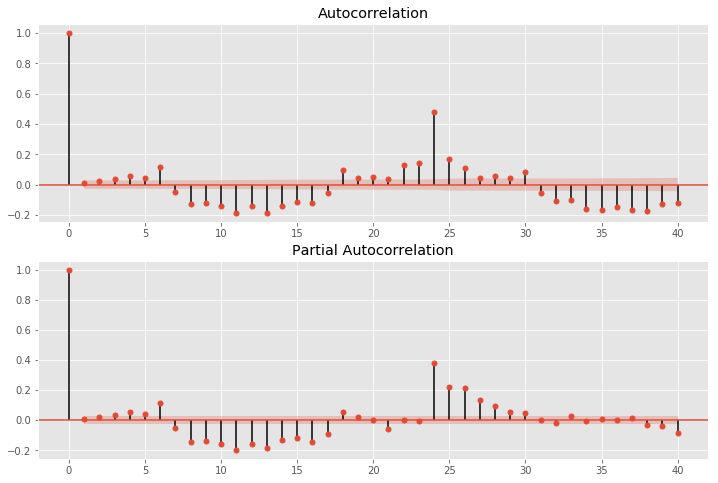

In [37]:
results.resid.plot()
plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()

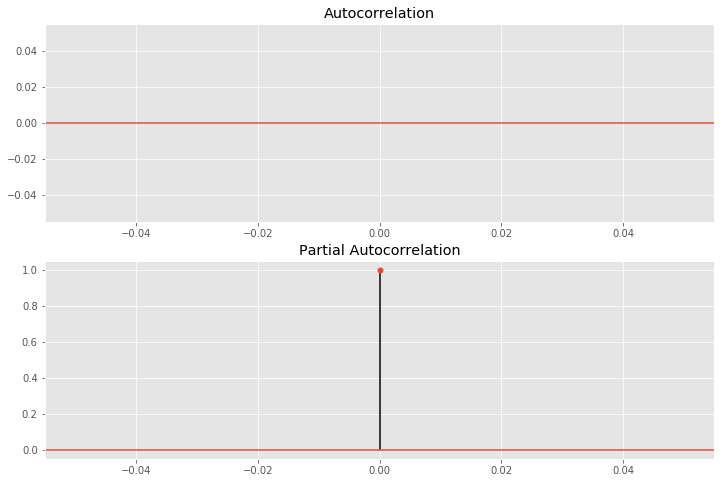

In [16]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y.diff().values, lags=24, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y.diff().values, lags=24, ax=ax2)

plt.show()

In [11]:
import statsmodels
print(statsmodels.tsa.stattools.adfuller(y.values))

(-5.503966264899934, 2.0415329794160195e-06, 30, 4960, {'1%': -3.431669090222372, '5%': -2.8621228942049535, '10%': -2.567080275469888}, 50562.77567974672)
